In [35]:
from sodapy import Socrata
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter


client = Socrata("www.datos.gov.co", None) #Se determina la dirección de la cual se extraeran los datos
results = client.get("gt2j-8ykr", limit=100000) #Se obtienen los datos y se establece un límite

# Convertir a dataframe de pandas
results_df = pd.DataFrame.from_records(results)

In [36]:
df=results_df
df=df.fillna('No Definido') #Se llenan los datos vacíos
tupla = (("T00:00:00.000", ""),("-", "/"))
for c in df.index:
    for a, b in tupla:
        df['fecha_de_notificaci_n'][c] = df['fecha_de_notificaci_n'][c].replace(a, b)
        df['fis'][c] = df['fis'][c].replace(a, b)
        df['fecha_diagnostico'][c] = df['fecha_diagnostico'][c].replace(a, b)
        df['fecha_recuperado'][c] = df['fecha_recuperado'][c].replace(a, b)
        df['fecha_reporte_web'][c] = df['fecha_reporte_web'][c].replace(a, b)
        df['fecha_de_muerte'][c] = df['fecha_de_muerte'][c].replace(a, b)
df.head()

KeyboardInterrupt: 

In [3]:
#Se convierten los datos de string a datatime object
for c in df.index:
    if(df['fecha_de_notificaci_n'][c]!='No Definido'):
        df['fecha_de_notificaci_n'][c]=datetime.strptime(df['fecha_de_notificaci_n'][c], '%Y/%m/%d')
    if(df['fis'][c]!='No Definido'):
        df['fis'][c]=datetime.strptime(df['fis'][c], '%Y/%m/%d')
    if(df['fecha_diagnostico'][c]!='No Definido'):
        df['fecha_diagnostico'][c]=datetime.strptime(df['fecha_diagnostico'][c], '%Y/%m/%d')
    if(df['fecha_recuperado'][c]!='No Definido'):
        df['fecha_recuperado'][c]=datetime.strptime(df['fecha_recuperado'][c], '%Y/%m/%d')
    if(df['fecha_reporte_web'][c]!='No Definido'):
        df['fecha_reporte_web'][c]=datetime.strptime(df['fecha_reporte_web'][c], '%Y/%m/%d')
    if(df['fecha_de_muerte'][c]!='No Definido'):
        df['fecha_de_muerte'][c]=datetime.strptime(df['fecha_de_muerte'][c], '%Y/%m/%d')

In [4]:
x=[] 
x=df['fecha_de_notificaci_n'] #Se llena con la fecha de notificación 
c=Counter(x) #Se cuentan los datos según la fecha de notificación

In [5]:
df1 = pd.DataFrame() #Se crea una nueva referencia del DataFrame
df1['Fecha']=c.keys() #Se extraen los elementos únicos
df1['No. Casos']=c.values() #Se extrae la frecuencia de cada elemento único

In [6]:
df1=df1.sort_values(by='Fecha') #Se ordenan según la fecha 

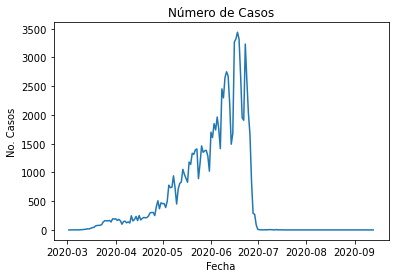

In [7]:
x = df1['Fecha'] #Se asignan los valores al eje x
y = df1['No. Casos'] #Se asignan los valores al eje y
plt.plot(x,y) #Se grafica
plt.title('Número de Casos')
plt.xlabel('Fecha')
plt.ylabel('No. Casos')
plt.savefig('Número de Casos.png') #Se guarda la imagen

In [8]:
import matplotlib
import numpy as np

y=[]
y=df['ciudad_de_ubicaci_n'] #Se llena con la ciudad
d=Counter(y) #Se cuentan los datos según la ciudad 

In [9]:
df2 = pd.DataFrame()
df2['Ciudad']=d.keys() #Se extraen los elementos únicos
df2['No. Casos']=d.values() #Se extrae la frecuencia de cada elemento único
df2=df2.sort_values(by='No. Casos',ascending=False) #Se ordena según el número de casos 

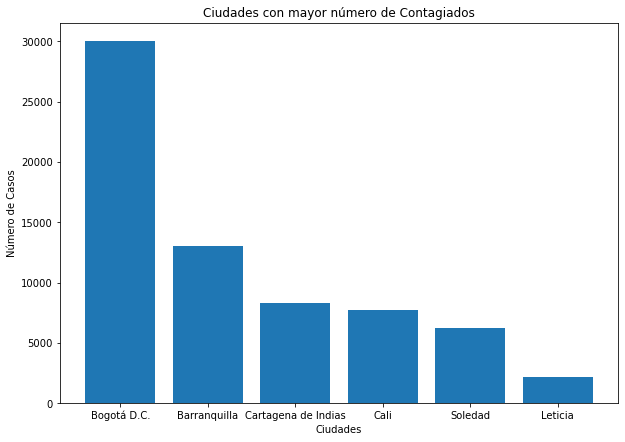

In [34]:
plt.figure(figsize=(10,7)) #Se establece el tamaño de la figura
#Colocamos etiquetas a los ejes
plt.xlabel("Ciudades")                       
plt.ylabel("Número de Casos") 

#Creamos la grafica de barras utilizando 'Ciudad' como eje X y 'Número de casos' como eje y.
x = df2['Ciudad'].iloc[0:6]
y = df2['No. Casos'].iloc[0:6]
plt.title("Ciudades con mayor número de Contagiados")
plt.bar(x, y)
#Finalmente mostramos la grafica con el metodo show()
plt.savefig('Ciudades.png')
plt.show()

In [16]:
tipo=[]
tipo=df['tipo']
#Se cuentan los casos según el tipo de contagio
e=Counter(tipo)
df3 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df3['Tipo']=e.keys()
df3['No. Casos']=e.values()
#Se ordenan
df3=df3.sort_values(by='No. Casos',ascending=False)

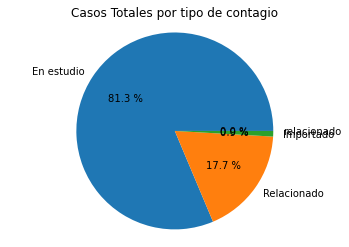

In [17]:
#Se grafica el diagrama de torta 
plt.pie(df3['No. Casos'], labels=df3['Tipo'], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Casos Totales por tipo de contagio")
plt.savefig('TipoContagio.png')
#Se muestra la grafica
plt.show()

In [18]:
estado=[]
estado=df['estado']
#Se cuentan los casos según el estado de los pacientes 
f=Counter(estado)
df4 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df4['Estado']=f.keys()
df4['No. Casos']=f.values()
df4=df4.sort_values(by='No. Casos',ascending=False)

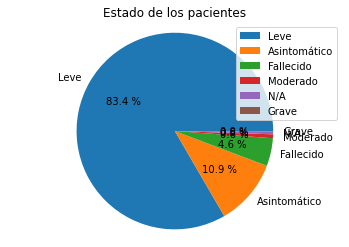

In [19]:
#Se grafica el diagrama de torta 
plt.pie(df4['No. Casos'], labels=df4['Estado'], autopct="%0.1f %%")
plt.axis("equal")
plt.title("Estado de los pacientes")
plt.legend()
plt.savefig('EstadoPacientes.png')
plt.show()

In [20]:
muertes=[]
muertes=df['fecha_de_muerte']
#Se cuentan los casos según la fecha de muerte
g=Counter(muertes)
df5 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df5['Muertes']=g.keys()
df5['No. Casos']=g.values()
df5=df5.sort_values(by='No. Casos',ascending=False)
#Se hace una copia del data frame 
copiamuertes=df5.iloc[1::].copy()

In [21]:
pais=[]
pais=df['pa_s_de_procedencia']
#Se cuentan los casos según el país de procedencia 
h=Counter(pais)
df6 = pd.DataFrame()
#Se establecen los elementos y la frecuencia de cada uno
df6['Pais de Procedencia']=h.keys()
df6['No. Casos']=h.values()
df6=df6.sort_values(by='No. Casos',ascending=False)
#Se hace una copia del data frame 
df6copy = df6.iloc[1:8].copy()
#Se organizan según el número de casos 
df6copy=df6copy.sort_values(by='No. Casos')


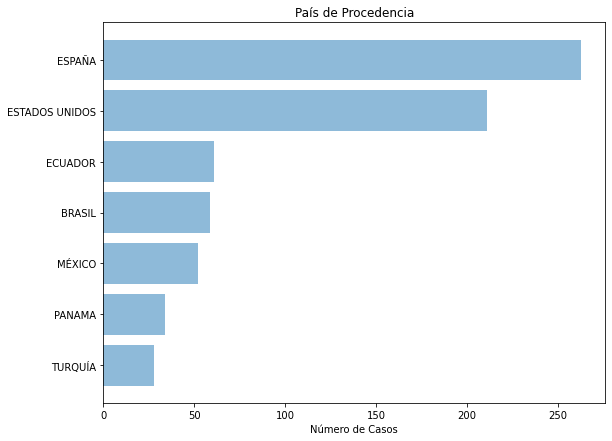

In [22]:
plt.figure(figsize=(9,7))
#Creamos la grafica pasando los valores en el eje X, Y, donde X = No de Casos y Y = País de Procedencia
x = df6copy['Pais de Procedencia']
y = df6copy['No. Casos']
plt.barh(x, y, align='center', alpha=0.5)
#añadimos una etiqueta en el eje X
plt.xlabel('Número de Casos')
plt.title('País de Procedencia')
plt.savefig('Pais.png')
plt.show()

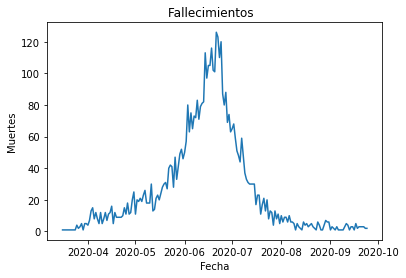

In [23]:
#Se organiza según el número de muertes 
copiamuertes=copiamuertes.sort_values(by='Muertes')
x = copiamuertes['Muertes']
y = copiamuertes['No. Casos']
#Se grafica
plt.plot(x,y)
plt.title('Fallecimientos  ')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
#Se guarda la gráfica como .png
plt.savefig('Fallecimientos.png')